In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
df = pd.read_csv('data/restaurant-reviews/restaurant_reviews.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [13]:
df.drop(['Pictures', '7514'], axis=1, inplace=True)
df['Review'] = df['Review'].astype('str') # Converting obj column to str

In [14]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37
...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22


In [15]:
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    return sentiment, compound_score

In [16]:
df[['Sentiment', 'Sentiment_Score']] = df['Review'].apply(get_sentiment).apply(pd.Series) #Add sentiment and score on dataframe

In [17]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Sentiment,Sentiment_Score
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,Positive,0.9676
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,Positive,0.9360
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,Positive,0.9186
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,Positive,0.8591
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,Positive,0.9245
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,Positive,0.9913
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,Positive,0.9720
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,Positive,0.9780
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,Positive,0.9359


<Axes: title={'center': 'Total Sentiment Percentage'}>

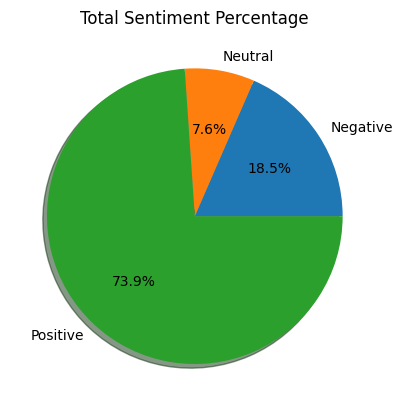

In [18]:
totalp = df.groupby(['Sentiment']).size()
totalp.plot.pie(title='Total Sentiment Percentage' ,autopct='%1.1f%%', shadow=True, startangle=0)

In [69]:
def create_pie_chart_with_scores(sentiment_data):
    sentiment_counts = sentiment_data['Sentiment'].value_counts()
    labels = sentiment_counts.index
    sizes = sentiment_counts.values
    colors = ['green', 'red', 'grey'] 

    # Create a figure with subplots
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Pie chart
    ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Sentiment Distribution by Restaurant')
    ax1.axis('equal') 

    # Highest sentiment score
    highest_score_row = sentiment_data.loc[sentiment_data['Sentiment_Score'].idxmax()]

    # Lowest sentiment score
    lowest_score_row = sentiment_data.loc[sentiment_data['Sentiment_Score'].idxmin()]

    # Display the corresponding sentiment scores to the right of the pie chart
    ax1.text(1.8, 0.5, f"Highest Score: {highest_score_row['Sentiment_Score']:.4f}", ha='center', va='center')
    ax1.text(1.8, 0.4, f"Lowest Score: {lowest_score_row['Sentiment_Score']:.4f}", ha='center', va='center')

    plt.show()

# Interactive widget with dropdown
@interact(restaurant=widgets.Dropdown(options=df['Restaurant'].unique(), value='Beyond Flavours', description='Restaurant',
                                      style={'description_width': 'initial', 'width': '50%'}))
def update_pie_chart_with_scores(restaurant):
    sentiment_data = df[df['Restaurant'] == restaurant]
    create_pie_chart_with_scores(sentiment_data)

interactive(children=(Dropdown(description='Restaurant', options=('Beyond Flavours', 'Paradise', 'Flechazo', '…